In [27]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
print(len(X_train))
print(len(X_test))

60000
10000


In [30]:
X_train[0].shape

(28, 28)

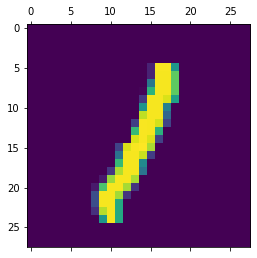

In [31]:
plt.matshow(X_train[3831])

In [32]:
y_train[3831]

1

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [34]:
X_train[3831]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [36]:
X_train_flattened.shape

(60000, 784)

In [37]:
X_train_flattened[3831]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [38]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 435us/step - loss: 0.4692 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 1s 435us/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 435us/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 1s 436us/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 1s 437us/step - loss: 0.2664 - accuracy: 0.9253


In [39]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 360us/step - loss: 0.2714 - accuracy: 0.9248


[0.27143609523773193, 0.9247999787330627]

In [40]:
y_predicted = model.predict(X_test_flattened)

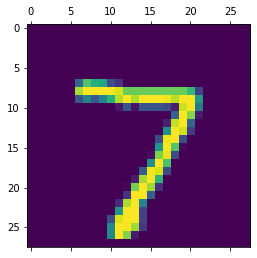

In [41]:
plt.matshow(X_test[0])

In [42]:
np.argmax(y_predicted[0])

7

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    9,  918,   20,   10,    2,   14,   10,   36,    4],
       [   4,    0,   15,  940,    0,   12,    3,    9,   18,    9],
       [   1,    1,    2,    2,  906,    0,   14,    4,   10,   42],
       [  12,    3,    2,   50,    9,  757,   18,    4,   31,    6],
       [  12,    3,    2,    2,    7,    8,  921,    2,    1,    0],
       [   1,    5,   22,   13,    7,    1,    0,  939,    3,   37],
       [  10,    8,    5,   34,    8,   21,   10,    8,  858,   12],
       [  11,    6,    1,   15,   16,    6,    0,   15,    4,  935]])>

Text(69.0, 0.5, 'Truth')

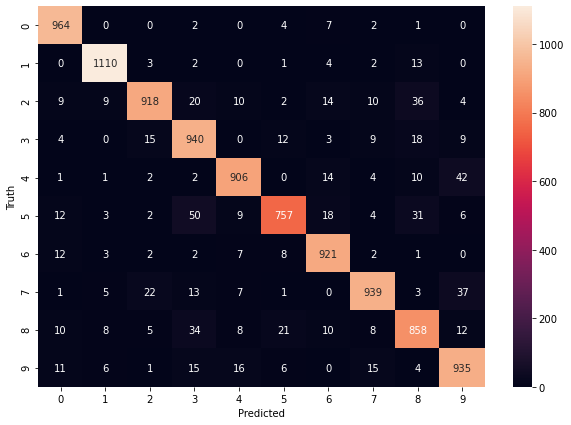

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 534us/step - loss: 0.2752 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 1s 535us/step - loss: 0.1266 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 1s 539us/step - loss: 0.0864 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 1s 539us/step - loss: 0.0658 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 1s 547us/step - loss: 0.0505 - accuracy: 0.9843


In [48]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 413us/step - loss: 0.0750 - accuracy: 0.9767


[0.07501348108053207, 0.9767000079154968]

Text(69.0, 0.5, 'Truth')

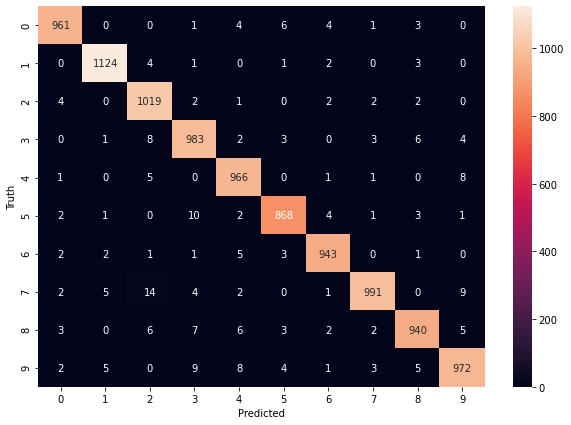

In [49]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 550us/step - loss: 0.2735 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 1s 546us/step - loss: 0.1233 - accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 1s 559us/step - loss: 0.0865 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 1s 547us/step - loss: 0.0648 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 1s 552us/step - loss: 0.0527 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 1s 561us/step - loss: 0.0422 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 1s 547us/step - loss: 0.0339 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 1s 547us/step - loss: 0.0285 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 1s 540us/step - loss: 0.0244 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 1s 545u

In [51]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 407us/step - loss: 0.0842 - accuracy: 0.9781


[0.08416629582643509, 0.9781000018119812]